In [1]:
import numpy as np
from qiskit import *
from qiskit.quantum_info.operators import Operator
import time
import tensornetwork as tn
import graphviz

In [2]:
def is_diagonal(U):
    i, j = np.nonzero(U)
    return np.all(i == j)

def add_hyper_index(var_list,hyper_index):
    for var in var_list:
        if not var in hyper_index:
            hyper_index[var]=0
            
def reshape(U):
    if U.shape==(2,2):
        return U
    
    if U.shape[0]==U.shape[1]:
        split_U=np.split(U,2,1)
    else:
        split_U=np.split(U,2,0)
    split_U[0]=reshape(split_U[0])
    split_U[1]=reshape(split_U[1]) 
    return np.array([split_U])[0]            
            
def get_real_qubit_num(cir):
    """Calculate the maximun number of qubits of a circuit"""
    gates=cir.data
    q=0
    for k in range(len(gates)):
        q=max(q,max([qbit.index for qbit in gates[k][1]]))
    return q+1

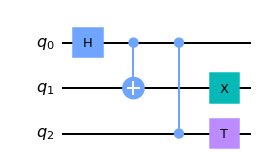

In [3]:
cir=QuantumCircuit(3)
cir.h(0)
cir.cx(0,1)
cir.cz(2,0)
cir.x(1)
cir.t(2)
cir.draw('mpl')


# 1 qubit -> edge[0]=in edge[1]=out 

# 2 qubit -> edge[0],[1]=in1,in2 edge[2][3]=out1,out2

In [4]:
qubits_num=get_real_qubit_num(cir) #Get the maximun qubits num.
gates=cir.data #Get circuit all gates data. 
Node=[]
edge=[]
gate_count=[0]*qubits_num
gate_label=[0]*qubits_num

for k in range(len(gates)):
    g=gates[k] #kth qubit.
    nam=g[0].name  #gate name.
    q = [q.index for q in g[1]]  #Which qubit operate the gate.
    U = g[0].to_matrix() #Get the gate matrix
    if len(q)>1:
        U=reshape(U) #Reshape 2-qubits gate to 4-order tensor.
    Node.append(tn.Node(U,nam))
    
    if gate_count[q[0]]==0:
        Node[k][0].set_name('x_'+str(q[0]))
    else:
        # edge_1=Node[gate_label[q[0]]][1] ^ Node[k][0]
        # edge_1.set_name('x_'+str(q[0]+'_'+str(gate_count[q[0]]))
        # edge.append(edge_1)
        edge.append(Node[gate_label[q[0]]][1] ^ Node[k][0])
       
    gate_count[q[0]]+=1
    gate_label[q[0]]=k
    if len(q)>1:
        gate_count[q[1]]+=1
        gate_label[q[1]]=k
# Node

/tmp/ipykernel_18658/2967669766.py:27: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  q=max(q,max([qbit.index for qbit in gates[k][1]]))
/tmp/ipykernel_18658/2261654404.py:11: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  q = [q.index for q in g[1]]  #Which qubit operate the gate.


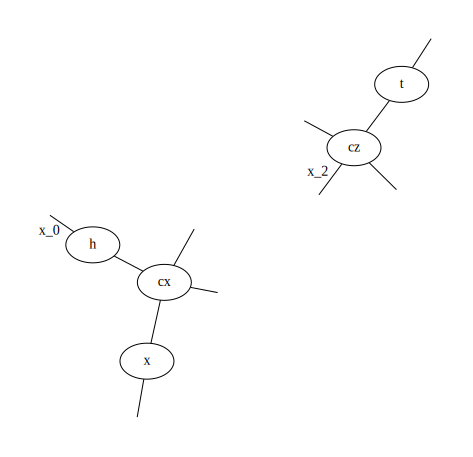

In [5]:
tn.to_graphviz(Node)